# Dogs vs Cats

In [1]:
#|default_exp app

In [2]:
#install gradio if it isn't already installed
!pip3 install gradio

In [3]:
!pip3 install nbdev

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr
def is_cat(subject): return subject[0].isupper()

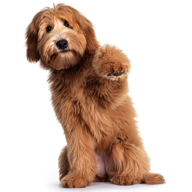

In [5]:
# Create an image object that can show itself and converts to TensorImage for the learner
im = PILImage.create('dog.jpeg')

# Set image dimensions
im.thumbnail((192,192))

# Show image
im

In [6]:
#|export
learn = load_learner('model.pkl')

In [7]:
learn.predict(im)
# output translation: 
# (
# "False = Dog; True = Cat", 
# tensor(0 = Dog; 1 = Cat), 
# tensor([probability that it is a Dog in scientific notation, probability that it is a Cat in scientific notation])
# )

('False', tensor(0), tensor([9.9992e-01, 8.4936e-05]))

In [8]:
#|export
categories = ('Dog','Cat')

def classify_image(img):
    # - 'pred' holds the predicted class as a string (e.g., either 'False' or 'True').
    # - 'idx' holds a numeric prediction as an number (e.g., either 0 or 1).
    # - 'probs' holds predicted probabilities for each class.
    pred, idx, probs = learn.predict(img)
    
    # Create a dictionary that maps class labels ('Dog' and 'Cat') to their corresponding
    # predicted probabilities as floating-point numbers (converted from scientific notation).
    return dict(zip(categories, map(float, probs)))

In [9]:
# show classification example on dog picture
classify_image(im)

{'Dog': 0.9999150037765503, 'Cat': 8.493648783769459e-05}

In [10]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ["dog.jpeg","cat.jpeg","dunno.jpeg"]

# simple gradio interface
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label,examples=examples)
intf.launch(inline=False)

/var/folders/l9/rsy69nl11y18s2w98bcxqbrr0000gn/T/ipykernel_96419/3534948687.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192,192))
/var/folders/l9/rsy69nl11y18s2w98bcxqbrr0000gn/T/ipykernel_96419/3534948687.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192,192))
/var/folders/l9/rsy69nl11y18s2w98bcxqbrr0000gn/T/ipykernel_96419/3534948687.py:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
/var/folders/l9/rsy69nl11y18s2w98bcxqbrr0000gn/T/ipykernel_96419/3534948687.py:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Export

In [12]:
import nbdev

# export file to app.py file in app directory
nbdev.export.nb_export('app.ipynb', 'app')